In [220]:
import numpy as np
import pandas as pd
from sklearn.datasets._samples_generator import make_blobs, make_moons
from sklearn.neighbors import NearestNeighbors
from math import dist
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns

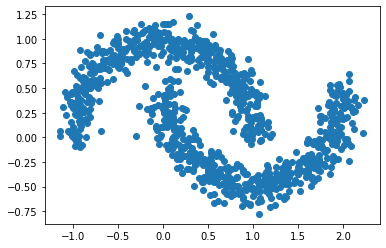

In [221]:
# X, y = make_blobs(n_samples=1000, centers=20, cluster_std=0.5, random_state=10)
# X, y = make_blobs(n_samples=4000, centers=8, cluster_std=0.60, random_state=15)
X, y = make_moons(n_samples=1000, noise=0.1)
plt.scatter(X[:, 0], X[:, 1])

In [222]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan',
          'navy', 'red', 'blue', 'green']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [223]:
min_pts = int(len(X)/200)

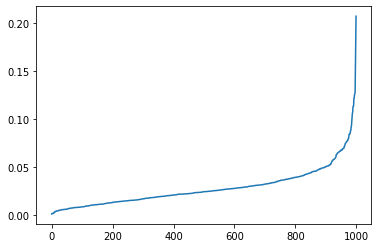

In [224]:
neigh = NearestNeighbors(n_neighbors=min_pts)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)

In [225]:
X

array([[ 1.72926146, -0.33645058],
       [ 0.21946981,  0.96180679],
       [ 0.35618272, -0.25696168],
       ...,
       [ 0.05843833,  0.45104055],
       [-0.20662348,  0.51864665],
       [ 0.63854372,  0.88987436]])

In [226]:
distances

array([0.00084611, 0.00084611, 0.00124513, 0.00124513, 0.00133547,
       0.00133547, 0.00180065, 0.00180065, 0.00232253, 0.00232253,
       0.00307228, 0.00307228, 0.00316311, 0.00316311, 0.00377921,
       0.00377921, 0.00392428, 0.00392428, 0.00394187, 0.00394187,
       0.00395349, 0.00395349, 0.00433934, 0.00433934, 0.0046549 ,
       0.0046549 , 0.00467676, 0.00467676, 0.00479965, 0.00479965,
       0.00486494, 0.00486494, 0.00520793, 0.00520793, 0.00522339,
       0.00522339, 0.00528564, 0.00528564, 0.00543602, 0.00543602,
       0.00549518, 0.00549518, 0.00555855, 0.00555855, 0.00568691,
       0.00568691, 0.00572393, 0.00572393, 0.00572475, 0.00572475,
       0.00579763, 0.00579763, 0.00593   , 0.00621207, 0.00621207,
       0.00653441, 0.00653441, 0.00654507, 0.00654507, 0.00665447,
       0.00665447, 0.00670846, 0.00670846, 0.00695316, 0.00695316,
       0.00699865, 0.00699865, 0.00701086, 0.00701086, 0.00714369,
       0.00715192, 0.00715192, 0.00737539, 0.00737539, 0.00742

In [227]:
diff = np.array([])
for key, value in enumerate(distances):
    if key != len(distances) - 1:
        diff = np.append(diff, abs(value - distances[key + 1]))

diffStd = diff.std()

for key, value in enumerate(diff):
    if value > 3 * diffStd:
        print(key)
        print(distances[key])
        eps = distances[key]
        print("***")
        break

984
0.09288916137072034
***


In [228]:
m = DBSCAN(eps=eps, min_samples=5)
m.fit(X)

DBSCAN(eps=0.09288916137072034)

In [229]:
clusters = m.labels_
clusters

array([ 0,  1,  0,  1,  1,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  0,  0,  0,  1,  1,  0,  0,  0,  1,  1,  0,  1,  0,  0,  0,
        1,  1,  1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  1,  0,  0,  1,  0,
        0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  1,  0,  1,  0,  0,  1,  0,
        0,  1,  0,  1,  0,  1,  0,  1,  1,  0,  1,  1,  0, -1,  0,  1,  0,
        1,  0,  1,  0,  1,  1,  0,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,
        1,  0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  0,  1,  0,  0,  1,  0,
        1,  0,  1,  0,  0,  1,  1,  0,  0,  1,  0,  1,  1,  1,  0,  1,  0,
        1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  1,  0,  1,  0,  0,  1,
        0,  0,  1,  0,  1,  1,  0,  0,  1, -1,  1,  0,  0,  0,  0,  1,  0,
        1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  0,  0,  1,
        1,  1,  0,  0,  1,  0,  0, -1,  0, -1,  0,  1,  0,  1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,  0, -1,  1,  0,  1,
        1, -1,  1,  1,  1

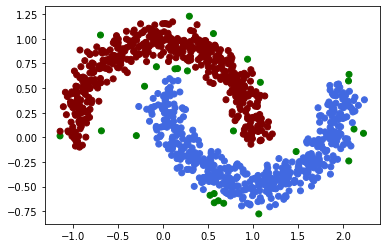

In [230]:
plt.scatter(X[:, 0], X[:, 1], c=vectorizer(clusters))

In [231]:
cluster_value = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
cluster_value


,0,1,cluster
0,1.729261,-0.336451,0
1,0.219470,0.961807,1
2,0.356183,-0.256962,0
3,0.855096,0.380519,1
4,0.757018,0.777616,1
...,...,...,...
995,0.743224,-0.415014,0
996,0.072984,0.596023,0
997,0.058438,0.451041,0
998,-0.206623,0.518647,-1


In [232]:
def calculate_member_core_point(cluster_values, cluster_number):
    core_point_arrays = cluster_values.groupby('cluster').get_group(cluster_number).drop('cluster', axis=1).to_numpy()
    core_points = dict()
    for pi in core_point_arrays:
        point = 0
        for pj in core_point_arrays:
            if dist(pi, pj) < eps:
                point += 1
        core_points[point] = pi
    return core_points

# dens_value = dict(sorted(calculate_member_core_point(cluster_value, 0).items(), reverse=True))
# dens_value

In [233]:
def find_center_point(point1, point2):
    n = len(point1)
    result = [0 for i in range(n)]
    for i in range(n):
        result[i] = (point1[i] + point2[i]) / 2
    return [result[i] for i, v in enumerate(result)]

In [234]:
find_center_point([5, 3, 4], [2, 7, 6])

[3.5, 5.0, 5.0]

In [235]:
def compress_data(dens_values):
    final_point = []
    not_check = []
    iterate = 0
    middlePoint = []
    for kpi, pi in dens_values.items():
        middlePoint = pi
        dens = 0
        continues = 0
        for key, check in enumerate(not_check):
            if (pi == check).all():
                continues = 1
                break
        if continues == 1:
            continue
        for kpj, pj in dens_values.items():
            if (dist(middlePoint, pj) < eps and dist(middlePoint, pj) != 0):
                middlePoint = find_center_point(middlePoint, pj)
                not_check.append(pj)
                dens += 1
        print(dens)
        middlePoint = np.append(middlePoint, dens)
        final_point.append(np.ndarray.tolist(np.array(middlePoint)))
    return final_point

In [236]:
all_data = []
for i in range(m.labels_.max() + 1):
    dens_value = dict(sorted(calculate_member_core_point(cluster_value, i).items(), reverse=True))
    all_data.append(compress_data(dens_value))

result = []
for i, vi in enumerate(all_data):
    for j, vj in enumerate(vi):
        result.append(vj)

result

1
2
2
0
0
0
0
0
0
1
0
0
0
0
0
0
0
2
1
1
0
0
0
4
0
0
0
0
0
0
0
0
0
0
0
0


[[1.345574348320108, -0.43487922445813243, 1.0],
 [1.6360223505899258, -0.252850559980373, 2.0],
 [1.175957784644321, -0.4326364672605552, 2.0],
 [1.2543231925210634, -0.523680488472514, 0.0],
 [0.7432242286095884, -0.4150136218634011, 0.0],
 [0.05843832665601398, 0.45104054556425055, 0.0],
 [0.11042188927562019, 0.20777012772929915, 0.0],
 [0.9663513503277383, -0.45321104005381235, 0.0],
 [1.873342001728229, 0.3204277237833265, 0.0],
 [1.6390754968299721, -0.0394226257482798, 1.0],
 [1.8224494939362677, -0.13292832806491675, 0.0],
 [2.1119728542885667, 0.25748037421815156, 0.0],
 [0.8905389100521521, -0.32936414027775074, 0.0],
 [2.030028077906756, -0.013444627384363916, 0.0],
 [0.07298362012606398, 0.596023100633724, 0.0],
 [1.724383470525221, 0.3004260422855241, 0.0],
 [2.106439835335631, 0.14886154607249563, 0.0],
 [-0.8682940403096593, 0.5645148407987037, 2.0],
 [0.49578896943243056, 0.9047232781981326, 1.0],
 [-0.5483630399155528, 0.8036362571579656, 1.0],
 [-0.8933891453475766, 

In [237]:
arrays_dens = np.array(result)
arrays_dens

array([[ 1.34557435, -0.43487922,  1.        ],
       [ 1.63602235, -0.25285056,  2.        ],
       [ 1.17595778, -0.43263647,  2.        ],
       [ 1.25432319, -0.52368049,  0.        ],
       [ 0.74322423, -0.41501362,  0.        ],
       [ 0.05843833,  0.45104055,  0.        ],
       [ 0.11042189,  0.20777013,  0.        ],
       [ 0.96635135, -0.45321104,  0.        ],
       [ 1.873342  ,  0.32042772,  0.        ],
       [ 1.6390755 , -0.03942263,  1.        ],
       [ 1.82244949, -0.13292833,  0.        ],
       [ 2.11197285,  0.25748037,  0.        ],
       [ 0.89053891, -0.32936414,  0.        ],
       [ 2.03002808, -0.01344463,  0.        ],
       [ 0.07298362,  0.5960231 ,  0.        ],
       [ 1.72438347,  0.30042604,  0.        ],
       [ 2.10643984,  0.14886155,  0.        ],
       [-0.86829404,  0.56451484,  2.        ],
       [ 0.49578897,  0.90472328,  1.        ],
       [-0.54836304,  0.80363626,  1.        ],
       [-0.89338915,  0.29521786,  0.   

In [238]:
new_dens = arrays_dens[np.where(arrays_dens[:, len(arrays_dens[0, :]) - 1] >= 3)]
new_dens

array([[-0.803621  ,  0.64400339,  4.        ]])

In [239]:
zero_dens = arrays_dens[np.where(arrays_dens[:, len(arrays_dens[0, :]) - 1] < 3)]
zero_dens

array([[ 1.34557435, -0.43487922,  1.        ],
       [ 1.63602235, -0.25285056,  2.        ],
       [ 1.17595778, -0.43263647,  2.        ],
       [ 1.25432319, -0.52368049,  0.        ],
       [ 0.74322423, -0.41501362,  0.        ],
       [ 0.05843833,  0.45104055,  0.        ],
       [ 0.11042189,  0.20777013,  0.        ],
       [ 0.96635135, -0.45321104,  0.        ],
       [ 1.873342  ,  0.32042772,  0.        ],
       [ 1.6390755 , -0.03942263,  1.        ],
       [ 1.82244949, -0.13292833,  0.        ],
       [ 2.11197285,  0.25748037,  0.        ],
       [ 0.89053891, -0.32936414,  0.        ],
       [ 2.03002808, -0.01344463,  0.        ],
       [ 0.07298362,  0.5960231 ,  0.        ],
       [ 1.72438347,  0.30042604,  0.        ],
       [ 2.10643984,  0.14886155,  0.        ],
       [-0.86829404,  0.56451484,  2.        ],
       [ 0.49578897,  0.90472328,  1.        ],
       [-0.54836304,  0.80363626,  1.        ],
       [-0.89338915,  0.29521786,  0.   

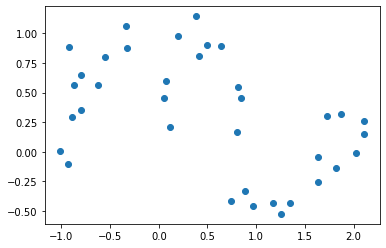

In [240]:
plt.scatter(arrays_dens[:, 0], arrays_dens[:, 1])

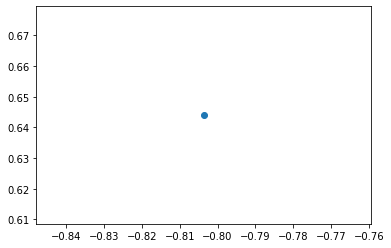

In [241]:
plt.scatter(new_dens[:, 0], new_dens[:, 1])

In [242]:
zero_dens_point = zero_dens[:, 0:len(zero_dens[0, :]) - 1]
zero_dens_point

array([[ 1.34557435, -0.43487922],
       [ 1.63602235, -0.25285056],
       [ 1.17595778, -0.43263647],
       [ 1.25432319, -0.52368049],
       [ 0.74322423, -0.41501362],
       [ 0.05843833,  0.45104055],
       [ 0.11042189,  0.20777013],
       [ 0.96635135, -0.45321104],
       [ 1.873342  ,  0.32042772],
       [ 1.6390755 , -0.03942263],
       [ 1.82244949, -0.13292833],
       [ 2.11197285,  0.25748037],
       [ 0.89053891, -0.32936414],
       [ 2.03002808, -0.01344463],
       [ 0.07298362,  0.5960231 ],
       [ 1.72438347,  0.30042604],
       [ 2.10643984,  0.14886155],
       [-0.86829404,  0.56451484],
       [ 0.49578897,  0.90472328],
       [-0.54836304,  0.80363626],
       [-0.89338915,  0.29521786],
       [ 0.84484907,  0.45039205],
       [ 0.8100407 ,  0.55081897],
       [-0.32856162,  0.87188638],
       [ 0.20113123,  0.97789721],
       [ 0.4151836 ,  0.80835635],
       [-1.014411  ,  0.01097873],
       [ 0.63854372,  0.88987436],
       [-0.33282809,

In [243]:
delete_values = []
for key, value in enumerate(X):
    for zkey, zval in enumerate(zero_dens_point):
        if dist(zval, value) < eps:
            delete_values.append(value)

remain_values = []
for key, value in enumerate(X):
    length = 0
    for dkey, dval in enumerate(delete_values):
        if (dval != value).all():
            length += 1
    if length == len(delete_values):
        remain_values.append(value)
remain_values = np.array(remain_values)
remain_values

array([[ 1.72926146, -0.33645058],
       [ 0.35618272, -0.25696168],
       [ 0.75701782,  0.77761613],
       ...,
       [ 0.56812615, -0.57124619],
       [ 0.99936043,  0.44500709],
       [-0.20662348,  0.51864665]])

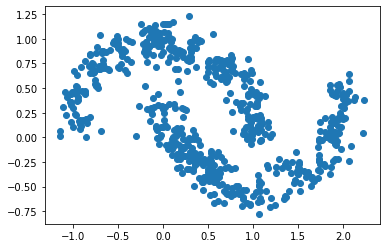

In [244]:
plt.scatter(remain_values[:, 0], remain_values[:, 1])

In [245]:
# neigh = NearestNeighbors(n_neighbors=5)
# nbrs = neigh.fit(remain_values)
# distances, indices = nbrs.kneighbors(remain_values)
# distances = np.sort(distances, axis=0)
# distances = distances[:, 1]
# plt.plot(distances)

In [246]:
# diff = np.array([])
# for key, value in enumerate(distances):
#     if key != len(distances) - 1:
#         diff = np.append(diff, abs(value - distances[key + 1]))
#
# diffStd = diff.std()
#
# for key, value in enumerate(diff):
#     if value > 4 * diffStd:
#         print(key)
#         print(distances[key])
#         eps = distances[key]
#         print("***")
#         break

In [247]:
m = DBSCAN(eps=eps, min_samples=min_pts)
m.fit(remain_values)

DBSCAN(eps=0.09288916137072034)

In [248]:
final_db_cluster = m.labels_
final_db_cluster

array([ 0,  1,  2,  3,  1,  1,  4,  1,  1,  0,  1,  1,  4,  5,  5, -1,  0,
        0,  3,  0,  2,  3,  1,  3,  0,  0,  1,  2,  3,  2,  2,  0,  3,  0,
        0,  4,  5,  5, -1,  0, -1,  0,  1,  1,  1, -1,  6,  4,  2,  3,  1,
        5,  0,  3,  6,  1,  5,  5, -1,  2,  1,  1,  2, -1,  4,  5,  5,  5,
        5,  1,  1,  4,  4,  1,  1,  0,  1,  0,  5,  0,  2,  1,  2,  1,  5,
        0,  2,  0,  3,  0,  0,  1, -1,  5,  3,  0,  0,  0,  1,  0, -1,  3,
        1,  2,  1,  1,  2,  2,  5,  3,  0,  1,  5, -1,  5,  1,  1,  1,  5,
        0,  0,  1,  0,  0,  0,  1,  0,  3,  5,  5,  1,  2,  0, -1, -1,  1,
        2, -1,  1,  1,  1,  0,  0,  1,  1,  1, -1,  1,  3,  2, -1,  2,  2,
        2,  5,  1,  2,  1,  0,  5,  1, -1,  3, -1,  1,  3,  5, -1,  2,  3,
        7,  2,  3,  7,  0,  1,  4,  1,  4,  2,  1,  2,  4,  3,  0,  0,  2,
        1,  4,  1,  2,  1,  1,  1,  5,  0,  2,  5,  2,  1,  2,  1,  3,  1,
        2,  4,  1, -1,  2,  3,  7,  5,  2,  2,  2,  2,  1, -1,  0,  5,  2,
       -1,  5, -1,  1, -1

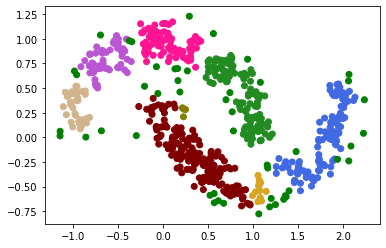

In [249]:
plt.scatter(remain_values[:, 0], remain_values[:, 1], c=vectorizer(final_db_cluster))

In [250]:
dens_cluster_value = pd.concat([pd.DataFrame(remain_values), pd.DataFrame(final_db_cluster, columns=['cluster'])],
                               axis=1)
dens_cluster_value

,0,1,cluster
0,1.729261,-0.336451,0
1,0.356183,-0.256962,1
2,0.757018,0.777616,2
3,-0.501098,0.928646,3
4,0.968117,-0.687542,1
...,...,...,...
635,1.952205,0.041004,0
636,-0.774913,0.661811,3
637,0.568126,-0.571246,-1
638,0.999360,0.445007,2


In [251]:
def find_center_point_cluster(cluster_values, cluster_number):
    center_points = []
    for i in range(cluster_number):
        mid_point = []
        denses = cluster_values.groupby('cluster').get_group(i).drop('cluster', axis=1).to_numpy()
        for key, value in enumerate(denses):
            if key == 0:
                mid_point = value
            if (key != len(denses)):
                mid_point = find_center_point(mid_point, value)
        center_points.append(mid_point)
    return center_points

center_point =find_center_point_cluster(dens_cluster_value, max(final_db_cluster) + 1)

In [252]:
center_point = np.array(center_point)
center_point

array([[ 1.83190057, -0.07777337],
       [ 0.44972071, -0.19762381],
       [ 0.86416678,  0.48261646],
       [-0.72201753,  0.68818801],
       [-0.91562357,  0.28534758],
       [ 0.16308164,  0.98808466],
       [ 0.23064046,  0.24827174],
       [ 1.03437258, -0.56380639]])

In [253]:
kmeans = KMeans(n_clusters=len(center_point), init=center_point, n_init=1)
kmeans.fit(X)
k_clusters = kmeans.labels_
k_clusters

array([7, 5, 1, 2, 5, 3, 5, 1, 6, 4, 1, 1, 0, 1, 6, 4, 5, 2, 5, 6, 7, 0,
       4, 4, 7, 7, 7, 2, 3, 1, 3, 7, 0, 6, 2, 3, 2, 2, 7, 1, 3, 7, 6, 0,
       4, 3, 5, 7, 7, 2, 7, 7, 4, 0, 7, 6, 6, 0, 6, 6, 6, 4, 7, 3, 7, 7,
       5, 7, 0, 3, 1, 3, 0, 3, 6, 5, 3, 6, 5, 3, 0, 1, 0, 2, 6, 3, 1, 5,
       1, 4, 4, 7, 4, 3, 5, 5, 3, 2, 1, 0, 6, 4, 4, 6, 6, 7, 6, 2, 7, 3,
       0, 2, 1, 6, 2, 7, 1, 3, 7, 7, 7, 4, 1, 0, 4, 4, 0, 7, 2, 6, 2, 5,
       3, 0, 3, 0, 2, 0, 7, 7, 6, 6, 5, 5, 0, 7, 3, 4, 1, 2, 1, 6, 2, 1,
       0, 2, 0, 3, 3, 0, 6, 5, 3, 5, 1, 1, 1, 7, 4, 5, 5, 0, 7, 3, 1, 7,
       7, 7, 0, 1, 4, 1, 3, 4, 7, 0, 3, 5, 5, 1, 1, 5, 0, 0, 0, 7, 1, 1,
       3, 1, 2, 2, 6, 1, 6, 6, 0, 7, 6, 7, 7, 5, 2, 5, 1, 1, 1, 5, 4, 6,
       3, 2, 7, 2, 2, 2, 5, 6, 2, 6, 7, 7, 3, 3, 6, 4, 5, 4, 3, 7, 6, 3,
       3, 2, 6, 5, 2, 0, 3, 7, 2, 4, 4, 7, 7, 7, 6, 4, 1, 4, 5, 4, 3, 7,
       1, 2, 4, 3, 4, 7, 4, 7, 0, 2, 1, 4, 5, 6, 2, 3, 6, 6, 5, 1, 7, 3,
       7, 7, 5, 7, 6, 5, 0, 0, 2, 6, 6, 7, 3, 6, 5,

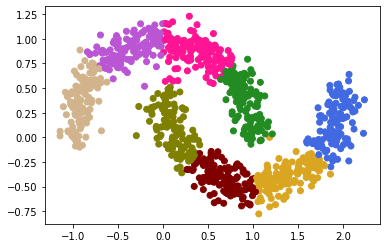

In [254]:
plt.scatter(X[:, 0], X[:, 1], c=vectorizer(k_clusters))